[![View notebook](https://img.shields.io/static/v1?label=render%20on&logo=github&color=87ce3e&message=GitHub)](https://github.com/open-atmos/PyPartMC/blob/main/examples/chamber.ipynb)   
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/open-atmos/PyPartMC/blob/main/examples/chamber.ipynb)    
[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/open-atmos/PyPartMC.git/main?urlpath=lab/tree/examples/chamber.ipynb)    
[![ARM JupyterHub](https://img.shields.io/static/v1?label=launch%20in&logo=jupyter&color=lightblue&message=ARM+JupyterHub)](https://jupyterhub.arm.gov/hub/user-redirect/git-pull?repo=https%3A//github.com/open-atmos/PyPartMC&branch=main&urlPath=) (requires [logging in with ARM account](https://www.arm.gov/capabilities/computing-resources) and directing Jupyter to a notebook within the cloned repo)

In [1]:
# This file is a part of PyPartMC licensed under the GNU General Public License v3
# Copyright (C) 2023 University of Illinois Urbana-Champaign
# Authors:
#  - https://github.com/compdyn/partmc/graphs/contributors
#  - https://github.com/open-atmos/PyPartMC/graphs/contributors

In [2]:
import sys
import os
if 'google.colab' in sys.modules:
    !pip --quiet install open-atmos-jupyter-utils
    from open_atmos_jupyter_utils import pip_install_on_colab
    pip_install_on_colab('PyPartMC')
elif 'JUPYTER_IMAGE' in os.environ and '.arm.gov' in os.environ['JUPYTER_IMAGE']:
    !pip --quiet install PyPartMC open_atmos_jupyter_utils
    _pypartmc_path = !pip show PyPartMC | fgrep Location | cut -f2 -d' '
    sys.path.extend(_pypartmc_path if _pypartmc_path[0] not in sys.path else [])

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from open_atmos_jupyter_utils import show_plot
import PyPartMC as ppmc
from PyPartMC import si

In [4]:
gas_data = ppmc.GasData(("H2SO4","HNO3","HCl","NH3","NO","NO2", "NO3",
                        "N2O5", "HONO", "HNO4", "O3", "O1D", "O3P", "OH",
                        "HO2", "H2O2", "CO", "SO2", "CH4", "C2H6", "CH3O2", 
                        "ETHP", "HCHO", "CH3OH", "ANOL", "CH3OOH", "ETHOOH",
                        "ALD2", "HCOOH", "RCOOH", "C2O3", "PAN", "ARO1", "ARO2",
                        "ALK1", "OLE1", "API1", "API2", "LIM1", "LIM2", "PAR", "AONE",
                        "MGLY", "ETH", "OLET", "OLEI", "TOL", "XYL", "CRES", "TO2",
                         "CRO", "OPEN", "ONIT", "ROOH", "RO2", "ANO2", "NAP", "XO2",
                         "XPAR", "ISOP", "ISOPRD", "ISOPP", "ISOPN", "ISOPO2", "API",
                         "LIM", "DMS", "MSA", "DMSO", "DMSO2", "CH3SO2H", "CH3SCH2OO", 
                         "CH3SO2", "CH3SO3", "CH3SO2OO", "CH3SO2CH2OO", "SULFHOX"
                        ))

In [5]:
env_state = ppmc.EnvState(
    {
        "rel_humidity": 0.00,
        "latitude": 0,
        "longitude": 0,
        "altitude": 0 * si.m,
        "start_time": 21600 * si.s,
        "start_day": 200,
    }
)

In [6]:
aero_data = ppmc.AeroData(
    (
        #         density  ions in soln (1) molecular weight    kappa (1)
        #         |                     |   |                   |
        {"SO4": [1760 * si.kg / si.m**3, 1, 96.0 * si.g / si.mol, 0.00]},
        {"NO3": [1800 * si.kg / si.m**3, 1, 62.0 * si.g / si.mol, 0.00]},
        {"Cl": [2200 * si.kg / si.m**3, 1, 35.5 * si.g / si.mol, 0.00]},
        {"NH4": [1760 * si.kg / si.m**3, 1, 18.0 * si.g / si.mol, 0.00]},
        {"MSA": [1800 * si.kg / si.m**3, 0, 95.0 * si.g / si.mol, 0.53]},
        {"ARO1": [1400 * si.kg / si.m**3, 0, 150.0 * si.g / si.mol, 0.10]},
        {"ARO2": [1400 * si.kg / si.m**3, 0, 150.0 * si.g / si.mol, 0.10]},
        {"ALK1": [1400 * si.kg / si.m**3, 0, 140.0 * si.g / si.mol, 0.10]},
        {"OLE1": [1400 * si.kg / si.m**3, 0, 140.0 * si.g / si.mol, 0.10]},
        {"API1": [1400 * si.kg / si.m**3, 0, 184.0 * si.g / si.mol, 0.10]},
        {"API2": [1400 * si.kg / si.m**3, 0, 184.0 * si.g / si.mol, 0.10]},
        {"LIM1": [1400 * si.kg / si.m**3, 0, 200.0 * si.g / si.mol, 0.10]},
        {"LIM2": [1400 * si.kg / si.m**3, 0, 200.0 * si.g / si.mol, 0.10]},
        {"CO3": [2600 * si.kg / si.m**3, 1, 60.0 * si.g / si.mol, 0.00]},
        {"Na": [2200 * si.kg / si.m**3, 1, 23.0 * si.g / si.mol, 0.00]},
        {"Ca": [2600 * si.kg / si.m**3, 1, 40.0 * si.g / si.mol, 0.00]},
        {"OIN": [2600 * si.kg / si.m**3, 0, 1.0 * si.g / si.mol, 0.10]},
        {"OC": [1566 * si.kg / si.m**3, 0, 1.0 * si.g / si.mol, 0.001]},
        {"BC": [1700 * si.kg / si.m**3, 0, 1.0 * si.g / si.mol, 0.00]},
        {"H2O": [1000 * si.kg / si.m**3, 0, 18.0 * si.g / si.mol, 0.00]},
    )
)

aero_data.frac_dim = 2.3
aero_data.vol_fill_factor = 1.43
aero_data.prime_radius = 4.5e-8

In [7]:
gas_state = ppmc.GasState(gas_data)

input_gas_state = (
    {"NO": [0.1E+00]},
)

gas_state.mix_rats = input_gas_state

In [8]:
times = [0 * si.s]
back_gas = [{"time": times},
            {"rate": [0 / si.s]},
            {"NO": [0.1E+00]},
           ]

gas_emit_times = [0]
gas_emit_rates = np.zeros(len(gas_emit_times))
SO2 = [4.234E-09]

emit_gas = [
    {"time": gas_emit_times},
    {"rate": list(gas_emit_rates)},
    {"SO2": SO2},
]

AERO_DIST_BACKGROUND = {
    "back_small": {
        "mass_frac": [{"SO4": [1]}, {"OC": [1.375]}, {"NH4": [0.375]}],
        "diam_type": "geometric",
        "mode_type": "log_normal",
        "num_conc": 0 / si.m**3,
        "geom_mean_diam": 0.02 * si.um,
        "log10_geom_std_dev": 0.161,
    },
}

AERO_DIST_EMIT = {
    "gasoline": {
        "mass_frac": [{"OC": [0.8]}, {"BC": [0.2]}],
        "diam_type": "geometric",
        "mode_type": "log_normal",
        "num_conc": 0 / si.m**3,
        "geom_mean_diam": 5e-8 * si.m,
        "log10_geom_std_dev": 0.24,
    },
}

In [9]:
time_timeseries = [0]
pressure_timeseries = list(np.ones(1) * 1e5)
temp_timeseries = [293.4]
height_timeseries = [1000]

In [10]:
scenario = ppmc.Scenario(
    gas_data,
    aero_data,
    {
        "temp_profile": [{"time": time_timeseries}, {"temp": temp_timeseries}],
        "pressure_profile": [
            {"time": time_timeseries},
            {"pressure": pressure_timeseries},
        ],
        "height_profile": [{"time": time_timeseries}, {"height": height_timeseries}],
        "gas_emissions": emit_gas,
        "gas_background": back_gas,
        "aero_emissions": [
            {"time": [0 * si.s]},
            {"rate": [0 / si.s]},
            {"dist": [[AERO_DIST_EMIT]]},
        ],
        "aero_background": [
            {"time": [0 * si.s]},
            {"rate": [2.293e-5 / si.s]},
            {"dist": [[AERO_DIST_BACKGROUND]]},
        ],
        "loss_function": "chamber",
        "chamber_vol": 0.2093,
        "area_diffuse": 1.988,
        "area_sedi": 0.2463,
        "prefactor_BL": 0.06,
        "exponent_BL": 0.26,
    },
)

In [11]:
T_INITIAL = 0.0
scenario.init_env_state(env_state, T_INITIAL)

In [12]:
diams = [1.33567e-08, 1.38477e-08, 1.43478e-08, 1.48479e-08, 1.53971e-08,
       1.59972e-08, 1.65481e-08, 1.71464e-08, 1.77975e-08, 1.84467e-08,
       1.91468e-08, 1.98469e-08, 2.05470e-08, 2.12962e-08, 2.20964e-08,
       2.28965e-08, 2.36966e-08, 2.45459e-08, 2.54460e-08, 2.63953e-08,
       2.73954e-08, 2.83956e-08, 2.94449e-08, 3.05450e-08, 3.16452e-08,
       3.27945e-08, 3.39947e-08, 3.52440e-08, 3.65442e-08, 3.78444e-08,
       3.92428e-08, 4.06940e-08, 4.21433e-08, 4.36927e-08, 4.52929e-08,
       4.69423e-08, 4.86917e-08, 5.04920e-08, 5.23414e-08, 5.42417e-08,
       5.62402e-08, 5.83406e-08, 6.04409e-08, 6.26394e-08, 6.49398e-08,
       6.72893e-08, 6.97388e-08, 7.23374e-08, 7.50379e-08, 7.77383e-08,
       8.05369e-08, 8.35356e-08, 8.66361e-08, 8.97857e-08, 9.30354e-08,
       9.64341e-08, 9.99838e-08, 1.03633e-07, 1.07432e-07, 1.11382e-07,
       1.15481e-07, 1.19731e-07, 1.24080e-07, 1.28629e-07, 1.33378e-07,
       1.38228e-07, 1.43276e-07, 1.48526e-07, 1.53975e-07, 1.59625e-07,
       1.65473e-07, 1.71572e-07, 1.77871e-07, 1.84370e-07, 1.91119e-07,
       1.98118e-07, 2.05367e-07, 2.12866e-07, 2.20664e-07, 2.28763e-07,
       2.37112e-07, 2.45810e-07, 2.54858e-07, 2.64207e-07, 2.73856e-07,
       2.83854e-07, 2.94252e-07, 3.05050e-07, 3.16249e-07, 3.27847e-07,
       3.39845e-07, 3.52293e-07, 3.65191e-07, 3.78539e-07, 3.92387e-07,
       4.06784e-07, 4.21732e-07, 4.37180e-07, 4.53177e-07, 4.69774e-07,
       4.86971e-07, 5.04818e-07, 5.23316e-07, 5.42462e-07, 5.62309e-07,
       5.82905e-07, 6.04302e-07, 6.26449e-07, 6.49395e-07, 6.73191e-07,
       6.97837e-07, 7.23383e-07, 7.49878e-07, 7.77374e-07, 8.05870e-07,
       8.35396e-07]

concs = [1.03e+07, 1.04e+07, 4.39e+06, 4.44e+06, 8.03e+06, 7.53e+06,
       3.77e+06, 9.10e+06, 9.77e+06, 1.32e+07, 1.54e+07, 2.26e+07,
       2.14e+07, 3.20e+07, 2.68e+07, 3.36e+07, 4.62e+07, 6.90e+07,
       8.63e+07, 9.12e+07, 1.11e+08, 1.50e+08, 1.57e+08, 1.96e+08,
       2.44e+08, 2.83e+08, 3.48e+08, 3.99e+08, 4.47e+08, 5.42e+08,
       5.91e+08, 6.37e+08, 7.77e+08, 8.68e+08, 9.50e+08, 1.13e+09,
       1.25e+09, 1.36e+09, 1.47e+09, 1.66e+09, 1.90e+09, 1.94e+09,
       2.14e+09, 2.38e+09, 2.40e+09, 2.58e+09, 2.81e+09, 2.87e+09,
       2.96e+09, 3.13e+09, 3.27e+09, 3.53e+09, 3.51e+09, 3.60e+09,
       3.81e+09, 3.90e+09, 3.87e+09, 3.89e+09, 3.91e+09, 3.94e+09,
       3.94e+09, 3.76e+09, 3.76e+09, 3.74e+09, 3.53e+09, 3.38e+09,
       3.34e+09, 3.19e+09, 3.00e+09, 2.81e+09, 2.56e+09, 2.42e+09,
       2.18e+09, 1.96e+09, 1.74e+09, 1.52e+09, 1.36e+09, 1.15e+09,
       9.86e+08, 8.00e+08, 6.91e+08, 5.82e+08, 4.58e+08, 3.65e+08,
       2.80e+08, 2.08e+08, 1.64e+08, 1.25e+08, 8.43e+07, 6.77e+07,
       6.23e+07, 3.54e+07, 3.59e+07, 3.04e+07, 1.90e+07, 1.31e+07,
       1.23e+07, 1.26e+07, 9.70e+06, 1.12e+07, 1.25e+07, 6.67e+06,
       8.67e+06, 8.51e+06, 6.23e+06, 5.12e+06, 5.63e+06, 5.36e+06,
       4.29e+06, 5.55e+06, 4.83e+06, 4.47e+06, 2.90e+06, 2.11e+06,
       3.86e+06]

AERO_DIST_INIT = [
    {
    "test_mode": {
        "mass_frac": [{"SO4": [96]}, {"NH4": [36]}],
        "diam_type": "geometric",
        "mode_type": "sampled",
        "size_dist": [
            {"diam": diams},
            {"num_conc": concs},
        ],
    }
    }
]

aero_dist_init = ppmc.AeroDist(aero_data, AERO_DIST_INIT)

In [13]:
run_part_opt = ppmc.RunPartOpt(
    {
        "output_prefix": "urban_plume",
        "do_coagulation": True,
        "coag_kernel": "brown",
        "t_max": 20160 * si.s,
        "del_t": 60 * si.s,
    }
)

N_PART = 100000
aero_state = ppmc.AeroState(aero_data, N_PART, 'nummass_source')
aero_state.dist_sample(
    aero_dist_init,
    sample_prop=1.0,
    create_time=0.0,
    allow_doubling=True,
    allow_halving=True,
)

33597

In [14]:
camp_core = ppmc.CampCore()
photolysis = ppmc.Photolysis()

In [15]:
N_STEPS = int(run_part_opt.t_max / run_part_opt.del_t)
num_conc = np.zeros(N_STEPS + 1)
num_conc[0] = aero_state.total_num_conc
mass_conc = np.zeros(N_STEPS + 1)
mass_conc[0] = aero_state.total_mass_conc
time = np.zeros(N_STEPS + 1)
gas_mix_rat = np.zeros((N_STEPS + 1, gas_state.n_spec))
gas_mix_rat[0, :] = gas_state.mix_rats

height = np.zeros((N_STEPS + 1))
temperature = np.zeros((N_STEPS + 1))
rh = np.zeros((N_STEPS + 1))

height[0] = env_state.height
temperature[0] = env_state.temp
rh[0] = env_state.rh

diam_grid = ppmc.BinGrid(30, "log", 1e-9, 1e-6)
dists = []
dry_diameters = aero_state.dry_diameters
num_concs = aero_state.num_concs
dists.append(ppmc.histogram_1d(diam_grid, dry_diameters, num_concs))
dist_times = [0]

last_output_time = 0.
last_progress_time = 0.
i_output = 1

for i_time in range(1,N_STEPS + 1):
    (last_output_time, last_progress_time, i_output) = ppmc.run_part_timestep(
        scenario,
        env_state,
        aero_data,
        aero_state,
        gas_data,
        gas_state,
        run_part_opt,
        camp_core,
        photolysis,
        i_time,
        T_INITIAL,
        last_output_time,
        last_progress_time,
        i_output
    )

    num_conc[i_time] = aero_state.total_num_conc
    mass_conc[i_time] = aero_state.total_mass_conc
    time[i_time] = env_state.elapsed_time
    gas_mix_rat[i_time, :] = gas_state.mix_rats
    height[i_time] = env_state.height
    temperature[i_time] = env_state.temp
    rh[i_time] = env_state.rh
    if np.mod(i_time * run_part_opt.del_t, 420.0) == 0:
        dry_diameters = aero_state.dry_diameters
        mobility_diameters = aero_state.mobility_diameters(env_state)
        num_concs = aero_state.num_concs
        dists.append(ppmc.histogram_1d(diam_grid, dry_diameters, num_concs))
        dist_times.append(env_state.elapsed_time)

In [16]:
plt.rcParams.update({'font.size': 9})
plt.rcParams.update({'figure.figsize': (3.08,2.5)})
plt.rcParams.update({"axes.grid" : True})

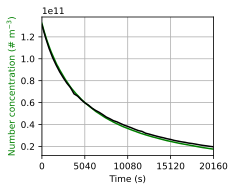

HTML(value="<a href='./tmpw9k3fqw7.pdf' target='_blank'>./tmpw9k3fqw7.pdf</a><br>")

In [17]:
plt.xlabel("Time (s)")
plt.plot(time, num_conc, "g", label="num conc")
plt.xticks(np.linspace(0, time[-1], 5))
plt.xlim([time[0],time[-1]])
plt.ylabel(r"Number concentration ($\#$ m$^{-3}$)", color='g')
barrel = np.loadtxt('chamber_data/0925/ref_aero_time.txt')
plt.plot(barrel[:,0],barrel[:,1],'k')
show_plot()

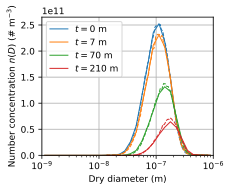

HTML(value="<a href='./tmpgd8zupv1.pdf' target='_blank'>./tmpgd8zupv1.pdf</a><br>")

In [18]:
plot_times = [0,1,10,30]
barrel = np.loadtxt('chamber_data/0925/ref_aero_size_num.txt')
diams_barrel = barrel[:,0]

for i_time in range(len(plot_times)):
    p = plt.plot(diam_grid.centers, np.array(dists[plot_times[i_time]]) * np.log(10),
             label='$t = %0.0f$ m' %(dist_times[plot_times[i_time]] / 60),lw=1)
    plt.plot(diams_barrel, barrel[:,plot_times[i_time]+1],'--',c=p[0].get_color(),lw=1)
plt.xscale("log")
plt.xlabel("Dry diameter (m)")
plt.ylabel(r"Number concentration $n(D)$ ($\#$ m$^{-3}$)")
plt.ylim(bottom=0)
plt.legend()
plt.xlim([diam_grid.edges[0],diam_grid.edges[-1]])
show_plot()